## NZU Carbon Price Data

In [1]:
import os
import os.path
import pandas as pd
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from datetime import datetime, timedelta
import pandas as pd
import pandas.io.sql as pd_sql
import sqlite3 as sqldb

con = sqldb.connect('data/nzu.db')

price_data = pd.read_sql('select * from Prices ORDER BY date', con, parse_dates=['Date'])


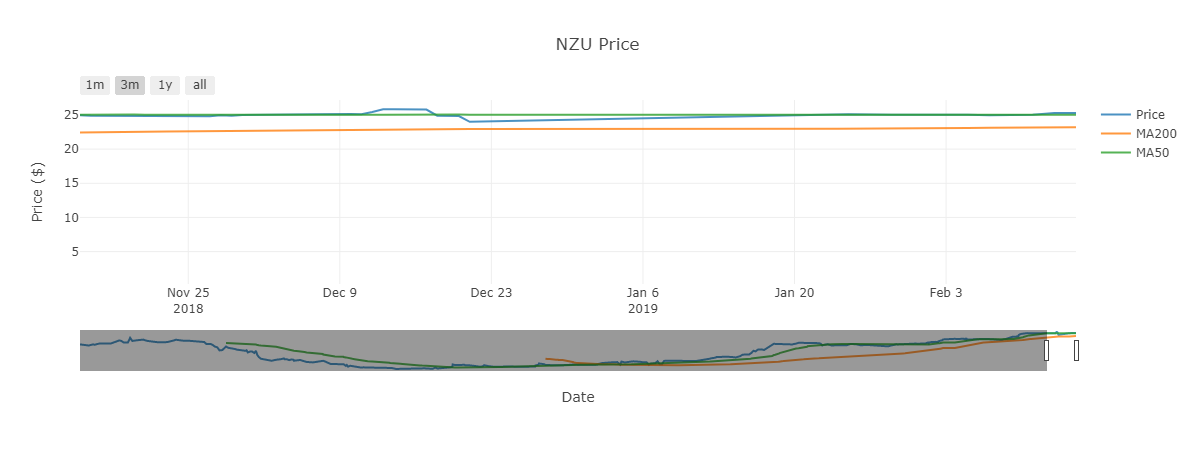

In [2]:
price_data['ma_200'] = price_data['spot'].rolling(200).mean()
price_data['ma_50'] = price_data['spot'].rolling(50).mean()
ma_200 = go.Scatter(name='MA200', x=price_data['date'], y=price_data['ma_200'], opacity=0.8)
ma_50 = go.Scatter(name='MA50', x=price_data['date'], y=price_data['ma_50'], opacity=0.8)
data = [go.Scatter(name='Price', x=price_data['date'], y=price_data['spot'], opacity=0.8), ma_200, ma_50]

layout = dict(
    title='NZU Price',
    height=800,
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=3,
                     label='3m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    ),
    yaxis=dict(
        title='Price ($)'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'time-series-simple')